# TensorFlow

We don't have to code up back propagation for every possible function or neural network architecture that we want to fit. There are lots of libraries targeted towards machine learning that make this task easy and computationally efficient. One of the most popular libraries is [TensorFlow](https://www.tensorflow.org/). It was developed by Google Brain and is now open source under the Apache License 2.0.

(Other popular choices in 2022 are [PyTorch](https://pytorch.org/) and [JAX](https://jax.readthedocs.io/))

The workflow consists of building a computational graph where "operations" act on "tensors" that can be automatically differentiated. Starting from tensorflow version 2 the operations are by default executed "eagerly" such that one can work with tensors in a similar way as with numpy arrays and typically does not have to worry about building the graph.

The TensorFlow website contains a much more [detailed introduction](https://www.tensorflow.org/guide/low_level_intro) if you want to learn more.

## Numpy-like syntax

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Tensors can be created via `tf.constant` from python lists or numpy arrays. Similar to numpy arrays, they have a `shape` and a `dtype`.

In [2]:
tf.constant([1, 2, 3], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [3]:
tf.constant(np.array([1, 2, 3]), dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [4]:
tf.constant([[1, 2], [3, 4], [5, 6]])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [5]:
tf.constant([[[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]],
             [[13, 14, 15, 16],
              [17, 18, 19, 20],
              [21, 22, 23, 24]]])

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]], dtype=int32)>

There are also convenience functions, e.g. to create equidistant or random values and all sorts of mathematical functions that represent operations on tensors.

In [6]:
tf.random.uniform((10, 2))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.48970187, 0.8690913 ],
       [0.7970767 , 0.14075994],
       [0.76985276, 0.12137532],
       [0.8937073 , 0.04096115],
       [0.89146745, 0.9629694 ],
       [0.36995733, 0.11012745],
       [0.7140106 , 0.2506659 ],
       [0.70615005, 0.65231967],
       [0.39964688, 0.16505098],
       [0.18281496, 0.23929548]], dtype=float32)>

In [7]:
t = tf.linspace(0., 2.*np.pi, 10)
t

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.        , 0.69813174, 1.3962635 , 2.0943952 , 2.792527  ,
       3.4906588 , 4.1887903 , 4.8869224 , 5.585054  , 6.2831855 ],
      dtype=float32)>

In [8]:
2 * t

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.       ,  1.3962635,  2.792527 ,  4.1887903,  5.585054 ,
        6.9813175,  8.377581 ,  9.773845 , 11.170108 , 12.566371 ],
      dtype=float32)>

In [9]:
tf.sin(t)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.0000000e+00,  6.4278764e-01,  9.8480779e-01,  8.6602539e-01,
        3.4202000e-01, -3.4202039e-01, -8.6602545e-01, -9.8480767e-01,
       -6.4278734e-01,  1.7484555e-07], dtype=float32)>

Tensors can be plotted like numpy arrays

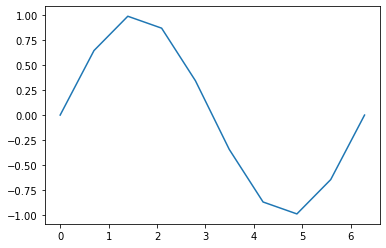

In [10]:
plt.plot(t, tf.sin(t))

Or explicitely converted via `.numpy()`

In [11]:
t.numpy()

array([0.        , 0.69813174, 1.3962635 , 2.0943952 , 2.792527  ,
       3.4906588 , 4.1887903 , 4.8869224 , 5.585054  , 6.2831855 ],
      dtype=float32)

In [12]:
tf.sin(t).numpy()

array([ 0.0000000e+00,  6.4278764e-01,  9.8480779e-01,  8.6602539e-01,
        3.4202000e-01, -3.4202039e-01, -8.6602545e-01, -9.8480767e-01,
       -6.4278734e-01,  1.7484555e-07], dtype=float32)

## Auto differentiation
The real power comes from tracing operations that allows automatic backpropagation to calculate gradients. This can be done using `tf.GradientTape`. By default the gradients w.r.t. tensors (constants) are not recorded, but only for `tf.Variable`. A `tf.Variable` represents a mutable state - this makes sense, since in many cases we want to modify the values on which we calculate gradients (e.g. training a neural network).

In [13]:
t = tf.Variable(tf.linspace(0., 2.*np.pi, 100))
t

<tf.Variable 'Variable:0' shape=(100,) dtype=float32, numpy=
array([0.        , 0.06346652, 0.12693304, 0.19039956, 0.25386608,
       0.3173326 , 0.3807991 , 0.44426563, 0.50773215, 0.5711987 ,
       0.6346652 , 0.6981317 , 0.7615982 , 0.8250648 , 0.88853127,
       0.95199776, 1.0154643 , 1.0789309 , 1.1423974 , 1.2058638 ,
       1.2693304 , 1.3327969 , 1.3962634 , 1.4597299 , 1.5231965 ,
       1.586663  , 1.6501296 , 1.713596  , 1.7770625 , 1.8405291 ,
       1.9039955 , 1.9674621 , 2.0309286 , 2.0943952 , 2.1578617 ,
       2.2213283 , 2.2847948 , 2.348261  , 2.4117277 , 2.4751942 ,
       2.5386608 , 2.6021273 , 2.6655939 , 2.7290604 , 2.7925267 ,
       2.8559933 , 2.9194598 , 2.9829264 , 3.046393  , 3.1098595 ,
       3.173326  , 3.2367926 , 3.300259  , 3.3637254 , 3.427192  ,
       3.4906585 , 3.554125  , 3.6175916 , 3.6810582 , 3.7445247 ,
       3.807991  , 3.8714576 , 3.9349241 , 3.9983907 , 4.061857  ,
       4.125324  , 4.1887903 , 4.252257  , 4.3157234 , 4.37919   ,
 

We can now calculate the derivative of the `sin` function w.r.t. `t` using `tf.GradientTape` in a context manager

In [14]:
with tf.GradientTape() as tape:
    f = tf.sin(t)
df = tape.gradient(f, t)

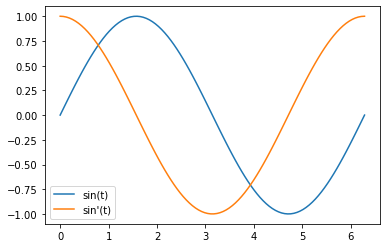

In [15]:
# Note: for plotting tf.Variable one always has to explicitely convert via .numpy()
# (not nescessary for Tensors/tf.constant)
plt.plot(t.numpy(), f, label="sin(t)")
plt.plot(t.numpy(), df, label="sin'(t)")
plt.legend()

To calculate gradients w.r.t. Tensors (`tf.constant`) instead of `tf.Variable`, use `tape.watch`:

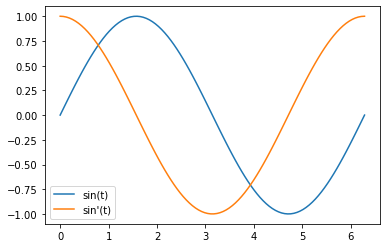

In [16]:
t_const = tf.linspace(0., 2.*np.pi, 100)
with tf.GradientTape() as tape:
    tape.watch(t_const)
    f = tf.sin(t_const)
plt.plot(t_const, f, label="sin(t)")
plt.plot(t_const, tape.gradient(f, t_const), label="sin'(t)")
plt.legend()

The computation of the gradient can also be recorded and we can calculate the gradient of the gradient to get the second derivative.

In [17]:
with tf.GradientTape() as tape0:
    with tf.GradientTape() as tape1:
        f = tf.sin(t)
    df = tape1.gradient(f, t)
ddf = tape0.gradient(df, t)

LookupError: gradient registry has no entry for: MLCSinGrad

The two gradient tapes are nescessary since tensorflow by default only allows one gradient to be calculated from a tape. If recording gradients themselves to the tape is intended one has to pass `persistent=True` - so the following works as well:

In [18]:
with tf.GradientTape(persistent=True) as tape:
    f = tf.sin(t)
    # this is inside the with block, so the gradient itself will also be recorded to the gradient tape
    df = tape.gradient(f, t)
# now we can calculate the gradient of the gradient
ddf_alternative = tape.gradient(df, t)

LookupError: gradient registry has no entry for: MLCSinGrad

NameError: name 'ddf' is not defined

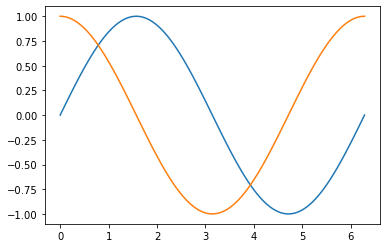

In [19]:
plt.plot(t.numpy(), f.numpy(), label="sin(t)")
plt.plot(t.numpy(), df.numpy(), label="sin'(t)")
plt.plot(t.numpy(), ddf.numpy(), label="sin''(t)")
plt.legend()

## Manually build a NN in TensorFlow

Let's build a 1-hidden-layer NN, similar to what we did in [NNFromScratchNumpy.ipynb](NNFromScratchNumpy.ipynb) now with TensorFlow.

First, we define the weights and biases for the hidden layer and the output layer via `tf.Variable`. We initialize the weights randomly (normal distribution) and the biases to 0. We will again use the convention with column vectors.

In [20]:
# hidden layer parameters
W = tf.Variable(tf.random.normal((16, 2)), name="W")
b = tf.Variable(tf.zeros((16, 1)))
print(W)
print(b)

<tf.Variable 'W:0' shape=(16, 2) dtype=float32, numpy=
array([[-0.72630984, -0.00545759],
       [-1.2317408 , -0.87267065],
       [-1.2237071 , -0.11954171],
       [-0.9738352 ,  0.93910956],
       [-0.5695663 ,  1.0953085 ],
       [ 0.3419073 , -0.7382464 ],
       [ 0.22537023,  1.6380353 ],
       [ 0.45336032,  0.36624607],
       [ 1.1635612 ,  0.89724565],
       [-0.4510688 ,  0.3654364 ],
       [-2.1120641 ,  0.91454744],
       [-0.24243267, -2.3603067 ],
       [ 1.4049532 , -1.0181416 ],
       [-0.90879494,  0.81345654],
       [-0.46710333, -0.913265  ],
       [ 1.6629755 , -0.64178246]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(16, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>


In [21]:
# output layer parameters
W2 = tf.Variable(tf.random.normal((1, 16)))
b2 = tf.Variable(tf.zeros((1, 1)))
print(W2)
print(b2)

<tf.Variable 'Variable:0' shape=(1, 16) dtype=float32, numpy=
array([[ 0.808338  ,  0.1531434 , -0.49776202,  1.3799297 , -0.35067466,
        -0.72667414, -0.8745159 , -0.79343253,  0.97112733,  0.7214589 ,
         0.28453377, -0.43824697, -0.04035038,  3.7991776 ,  1.4646466 ,
        -0.864121  ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.]], dtype=float32)>


Now, let's propagate some inputs through the neural network.

In [22]:
inp = tf.random.normal((10, 2, 1))
inp

<tf.Tensor: shape=(10, 2, 1), dtype=float32, numpy=
array([[[ 1.0506794 ],
        [ 0.36753052]],

       [[-1.1834087 ],
        [ 1.2328981 ]],

       [[-0.28827983],
        [ 0.46150866]],

       [[ 0.5152769 ],
        [-0.21566683]],

       [[-0.18445948],
        [ 0.73982996]],

       [[-1.0714079 ],
        [-0.2562689 ]],

       [[ 0.8203896 ],
        [ 0.95971173]],

       [[-1.0274022 ],
        [-0.09493383]],

       [[ 1.1469103 ],
        [ 0.13052867]],

       [[-1.4135598 ],
        [-0.55361015]]], dtype=float32)>

The output of the first hidden layer.

In [23]:
z = tf.add(tf.matmul(W, inp), b)
z

<tf.Tensor: shape=(10, 16, 1), dtype=float32, numpy=
array([[[-0.7651246 ],
        [-1.6148978 ],
        [-1.3296591 ],
        [-0.67803717],
        [-0.19587228],
        [ 0.08790687],
        [ 0.8388198 ],
        [ 0.61094296],
        [ 1.5522951 ],
        [-0.33961964],
        [-1.8829783 ],
        [-1.1222038 ],
        [ 1.1019573 ],
        [-0.65588206],
        [-0.82642865],
        [ 1.5113796 ]],

       [[ 0.85279274],
        [ 0.38173878],
        [ 1.3007629 ],
        [ 2.3102715 ],
        [ 2.0244336 ],
        [-1.3147987 ],
        [ 1.7528255 ],
        [-0.08496648],
        [-0.270756  ],
        [ 0.9843446 ],
        [ 3.6269789 ],
        [-2.6231208 ],
        [-2.9178987 ],
        [ 2.0783849 ],
        [-0.57318854],
        [-2.759232  ]],

       [[ 0.20686175],
        [-0.04765904],
        [ 0.29760054],
        [ 0.71414423],
        [ 0.6696888 ],
        [-0.43927208],
        [ 0.69099784],
        [ 0.03833109],
        [ 0.07865539],


In [24]:
a = tf.nn.relu(z)
a

<tf.Tensor: shape=(10, 16, 1), dtype=float32, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.08790687],
        [0.8388198 ],
        [0.61094296],
        [1.5522951 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [1.1019573 ],
        [0.        ],
        [0.        ],
        [1.5113796 ]],

       [[0.85279274],
        [0.38173878],
        [1.3007629 ],
        [2.3102715 ],
        [2.0244336 ],
        [0.        ],
        [1.7528255 ],
        [0.        ],
        [0.        ],
        [0.9843446 ],
        [3.6269789 ],
        [0.        ],
        [0.        ],
        [2.0783849 ],
        [0.        ],
        [0.        ]],

       [[0.20686175],
        [0.        ],
        [0.29760054],
        [0.71414423],
        [0.6696888 ],
        [0.        ],
        [0.69099784],
        [0.03833109],
        [0.07865539],
        [0.2986861 ],
        [1.0309371 

In [25]:
z2 = tf.add(tf.matmul(W2, a), b2)
z2

<tf.Tensor: shape=(10, 1, 1), dtype=float32, numpy=
array([[[-1.125186 ]],

       [[10.683871 ]],

       [[ 3.1418276]],

       [[-1.0385481]],

       [[ 3.6682014]],

       [[ 5.65315  ]],

       [[-0.9310705]],

       [[ 6.04597  ]],

       [[-1.304131 ]],

       [[ 6.5653496]]], dtype=float32)>

We will skip the activation function, since we will use a loss function that already applies the sigmoid transformation. This is numerically more stable.

But first, we need to define the labels. For this experiment, let's choose them randomly.

In [26]:
y = tf.Variable(np.random.randint(0, 2, size=inp.shape[0]).reshape(-1, 1, 1), dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=(10, 1, 1) dtype=float32, numpy=
array([[[1.]],

       [[1.]],

       [[1.]],

       [[1.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[0.]],

       [[1.]],

       [[0.]]], dtype=float32)>

Now the binary cross entropy with a sigmoid transformation of the input values that don't have the sigmoid applied already.

In [27]:
L = tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z2)
L

<tf.Tensor: shape=(10, 1, 1), dtype=float32, numpy=
array([[[1.4062905e+00]],

       [[2.2911245e-05]],

       [[4.2296525e-02]],

       [[1.3415878e+00]],

       [[3.6934035e+00]],

       [[5.6566505e+00]],

       [[3.3227170e-01]],

       [[6.0483346e+00]],

       [[1.5442562e+00]],

       [[6.5667567e+00]]], dtype=float32)>

Now - **and this is the whole point of this tutorial** - to get the gradients w.r.t. all parameters, we can record the parameters to a `tf.GradientTape` and get the gradients w.r.t. all parameters.

In [28]:
def forward_NN(inp):
    z = tf.add(tf.matmul(W, inp), b)
    a = tf.nn.relu(z)
    z2 = tf.add(tf.matmul(W2, a), b2)
    return tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=z2)

In [29]:
with tf.GradientTape() as tape:
    L = forward_NN(inp)
parameters = dict(W=W, b=b, W2=W2, b2=b2)
# the gradient will have the same structure (dict, tuple) as the parameters
grad_NN = tape.gradient(L, parameters)
grad_NN

{'W': <tf.Tensor: shape=(16, 2), dtype=float32, numpy=
 array([[-2.9683094e+00, -1.6218358e-01],
        [-5.3664279e-01, -1.3827974e-01],
        [ 1.8278391e+00,  9.9870101e-02],
        [-4.7472119e+00,  9.7532749e-02],
        [ 1.2063854e+00, -2.4785489e-02],
        [ 1.5084713e+00,  1.6048351e-01],
        [ 1.4265635e+00, -5.1899230e-01],
        [ 1.5962719e+00, -5.9727681e-01],
        [-1.9537683e+00,  7.3104107e-01],
        [-2.6492796e+00, -1.4475229e-01],
        [-1.0448406e+00, -5.7088375e-02],
        [ 1.7024928e+00,  3.2589343e-01],
        [ 7.4403115e-02, -2.0365329e-03],
        [-1.3069870e+01,  2.6852417e-01],
        [-5.1324315e+00, -1.3224509e+00],
        [ 1.5933753e+00, -4.3613225e-02]], dtype=float32)>,
 'b': <tf.Tensor: shape=(16, 1), dtype=float32, numpy=
 array([[ 3.173869  ],
        [ 0.4583145 ],
        [-1.9544193 ],
        [ 5.8082905 ],
        [-1.476032  ],
        [ 1.6568524 ],
        [ 0.28430143],
        [ 0.8439286 ],
        [-1.0329

## Inspect the computation graph

Another way to trace computation graphs (other than `tf.GradientTape`) is by wrapping the operations into a `tf.function`. We won't go into detail here - have a look at the [`tf.function` tutorials](https://www.tensorflow.org/guide/intro_to_graphs) for further information.

For illustration we use it here to display the computation graph with the `tensorboard` extension for Jupyter notebooks:

In [30]:
%load_ext tensorboard

In [31]:
# from https://www.tensorflow.org/tensorboard/graphs

from datetime import datetime
logdir = f"logs/{datetime.now().strftime('%Y%m%d-%H%M%S')}"
writer = tf.summary.create_file_writer(logdir)

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=True)
# Call only one tf.function when tracing.
L = tf.function(forward_NN)(inp)
with writer.as_default():
    tf.summary.trace_export(
          name="my_func_trace",
          step=0,
          profiler_outdir=logdir
    )

Instructions for updating:
use `tf.profiler.experimental.start` instead.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.
Instructions for updating:
`tf.python.eager.profiler` has deprecated, use `tf.profiler` instead.


ProfilerNotRunningError: Cannot stop profiling. No profiler is running.

If you run this notebook remotely at CIP you need to forward the port for the tensorboard process (6006), e.g. via (in a terminal on your local machine)
```
ssh -L 6006:localhost:6006 <your-username>@<your-cip-host>
```

In [ ]:
!hostname

In [ ]:
%tensorboard --logdir $logdir

In [ ]:
# kill the tensorboard process
!sleep 3
!killall tensorboard

## Compare to NNFromScratch

Let's see if we can reproduce that with the formulas we used in [NNFromScratchNumpy.ipynb](NNFromScratchNumpy.ipynb)

Here a copy paste of the relevant functions:

In [32]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

def sigmoid_derivative(Z):
    sig = sigmoid(Z)
    return sig * (1 - sig)

def relu_derivative(Z):
    dZ = (Z >= 0)
    return dZ

In [33]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation="relu"):
    Z_curr = np.matmul(W_curr, A_prev) + b_curr
    
    if activation == "relu":
        activation_func = relu
    elif activation == "sigmoid":
        activation_func = sigmoid
    else:
        raise Exception('Non-supported activation function')
        
    return activation_func(Z_curr), Z_curr

In [34]:
def single_layer_backward_propagation(dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
    
    if activation == "relu":
        derivative_activation_func = relu_derivative
    elif activation == "sigmoid":
        derivative_activation_func = sigmoid_derivative
    else:
        raise Exception('Non-supported activation function')
            
    dZ_curr = dA_curr * derivative_activation_func(Z_curr)
    dW_curr = np.matmul(
        dZ_curr,
        # need to transpose only the last 2 dimensions, 
        # since the first dimension is the training example index
        np.transpose(A_prev, (0, 2, 1))
    )
    db_curr = dZ_curr
    dA_prev = np.matmul(W_curr.T, dZ_curr)

    return dA_prev, dW_curr, db_curr

In [35]:
def get_loss_value(Y_hat, Y):
    return - np.mean(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat))

In [36]:
def get_loss_derivative(Y_hat, Y):
    return - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));

First let's calculate the forward pass.

First, lets store the initialized values of the NN parameters, inputs and labels in python variables

In [37]:
inp_val, W_val, b_val, W2_val, b2_val, y_val = inp.numpy(), W.numpy(), b.numpy(), W2.numpy(), b2.numpy(), y.numpy()

And then run our manual `numpy` forward propagation

In [38]:
a_val, z_val = single_layer_forward_propagation(inp_val, W_val, b_val)
print(a_val[0].ravel())
print(z_val[0].ravel())

[0.         0.         0.         0.         0.         0.08790688
 0.83881986 0.61094296 1.5522951  0.         0.         0.
 1.1019574  0.         0.         1.5113796 ]
[-0.7651246  -1.6148978  -1.3296591  -0.67803717 -0.19587226  0.08790688
  0.83881986  0.61094296  1.5522951  -0.33961967 -1.8829783  -1.1222038
  1.1019574  -0.65588206 -0.82642865  1.5113796 ]


compared to what `tf` gave us

In [39]:
print(a[0].numpy().ravel())
print(z[0].numpy().ravel())

[0.         0.         0.         0.         0.         0.08790687
 0.8388198  0.61094296 1.5522951  0.         0.         0.
 1.1019573  0.         0.         1.5113796 ]
[-0.7651246  -1.6148978  -1.3296591  -0.67803717 -0.19587228  0.08790687
  0.8388198   0.61094296  1.5522951  -0.33961964 -1.8829783  -1.1222038
  1.1019573  -0.65588206 -0.82642865  1.5113796 ]


Next layer:

In [40]:
a2_val, z2_val = single_layer_forward_propagation(
    a_val, W2_val, b2_val, activation="sigmoid"
)
print(a2_val.ravel())
print(z2_val.ravel())

[0.24505062 0.9999771  0.95858556 0.2614302  0.97511286 0.99650586
 0.28270757 0.9976382  0.21347062 0.9985936 ]
[-1.125186  10.683872   3.1418276 -1.0385482  3.6682014  5.6531496
 -0.9310706  6.04597   -1.3041309  6.5653496]


For `tf`, we don't have `a2` because we used a definition of the loss function where the sigmoid activation is already included. But we have `z2`:

In [41]:
z2.numpy().ravel()

array([-1.125186 , 10.683871 ,  3.1418276, -1.0385481,  3.6682014,
        5.65315  , -0.9310705,  6.04597  , -1.304131 ,  6.5653496],
      dtype=float32)

Great, we implemented the forward pass correctly, so now lets do the backward pass and check if we get the same gradients like Tensorflow

In [42]:
dL = get_loss_derivative(a2_val, y_val)
dL.ravel()

array([ -4.0807896,  -1.0000229,  -1.0432037,  -3.8251128,  40.18139  ,
       286.19318  ,   1.3941315, 423.41046  ,  -4.6844854, 711.0496   ],
      dtype=float32)

Propagate back into the output layer

In [43]:
da, dW2, db2 = single_layer_backward_propagation(
    dL, W2_val, b2_val, z2_val, a_val, activation="sigmoid"
)
print(np.sum(dW2, axis=0).ravel())
print(np.sum(db2, axis=0).ravel())

[ 2.668188    5.1042194   4.5175776   3.4165483   2.036829   -0.54671127
  0.604475   -0.6363945  -1.665493    1.5830557   7.5722485   2.6969914
 -2.642017    3.1839168   2.4614296  -3.0987957 ]
[1.9290721]


In [44]:
print(grad_NN["W2"].numpy().ravel())
print(grad_NN["b2"].numpy().ravel())

[ 2.6681876   5.1042194   4.517577    3.416548    2.0368288  -0.5467112
  0.6044749  -0.63639444 -1.665493    1.5830556   7.572248    2.6969914
 -2.6420166   3.1839166   2.461429   -3.0987954 ]
[1.9290721]


And from there into the hidden layer

In [45]:
dinp, dW, db = single_layer_backward_propagation(
    da, W_val, b_val, z_val, inp_val, activation="relu"
)
print(np.sum(dW, axis=0))
print(np.sum(db, axis=0).ravel())

[[-2.9683099e+00 -1.6218352e-01]
 [-5.3664279e-01 -1.3827974e-01]
 [ 1.8278394e+00  9.9870086e-02]
 [-4.7472124e+00  9.7532749e-02]
 [ 1.2063855e+00 -2.4785519e-02]
 [ 1.5084713e+00  1.6048351e-01]
 [ 1.4265637e+00 -5.1899230e-01]
 [ 1.5962720e+00 -5.9727681e-01]
 [-1.9537684e+00  7.3104107e-01]
 [-2.6492796e+00 -1.4475226e-01]
 [-1.0448407e+00 -5.7088368e-02]
 [ 1.7024930e+00  3.2589346e-01]
 [ 7.4403122e-02 -2.0365315e-03]
 [-1.3069871e+01  2.6852417e-01]
 [-5.1324320e+00 -1.3224509e+00]
 [ 1.5933753e+00 -4.3613195e-02]]
[ 3.173869    0.45831457 -1.9544194   5.808291   -1.476032    1.6568525
  0.28430146  0.84392875 -1.0329325   2.832746    1.1171973  -0.9878824
  0.08059347 15.991199    4.383303    1.7259445 ]


In [46]:
print(grad_NN["W"].numpy())
print(grad_NN["b"].numpy().ravel())

[[-2.9683094e+00 -1.6218358e-01]
 [-5.3664279e-01 -1.3827974e-01]
 [ 1.8278391e+00  9.9870101e-02]
 [-4.7472119e+00  9.7532749e-02]
 [ 1.2063854e+00 -2.4785489e-02]
 [ 1.5084713e+00  1.6048351e-01]
 [ 1.4265635e+00 -5.1899230e-01]
 [ 1.5962719e+00 -5.9727681e-01]
 [-1.9537683e+00  7.3104107e-01]
 [-2.6492796e+00 -1.4475229e-01]
 [-1.0448406e+00 -5.7088375e-02]
 [ 1.7024928e+00  3.2589343e-01]
 [ 7.4403115e-02 -2.0365329e-03]
 [-1.3069870e+01  2.6852417e-01]
 [-5.1324315e+00 -1.3224509e+00]
 [ 1.5933753e+00 -4.3613225e-02]]
[ 3.173869    0.4583145  -1.9544193   5.8082905  -1.476032    1.6568524
  0.28430143  0.8439286  -1.0329325   2.8327456   1.117197   -0.98788226
  0.08059345 15.991198    4.383303    1.7259443 ]


Great! Tensorflow does the same thing we attempted to do before.